In [2]:
%matplotlib ipympl
from sympy import *
from sympy.physics.mechanics import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\ffmpeg\\bin\\ffmpeg.exe'

# enable LaTeX printing
init_vprinting()

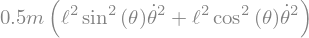

In [ ]:
# create symbolic variables
m, g, ell, t = symbols('m g ell t')
theta = dynamicsymbols('theta')

# define xm and ym
xm = ell*sin(theta)
ym = -ell*cos(theta)

# derivative
xm_dot = diff(xm, t)
ym_dot = diff(ym, t)

theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)

# Lagrangian
T = 1/2*m*(xm_dot**2 + ym_dot**2)
V = m*g*ym
L = T-V

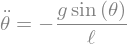

In [3]:
# Euler-Lagrange Equation
eqn = diff(diff(L,theta_dot), t) - diff(L, theta)

# Solution
sln = solve(eqn, theta_ddot)[0]
Eq(theta_ddot, sln)

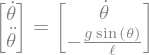

In [4]:
x = Matrix([theta, theta_dot])
x_dot = diff(x,t)
Eq(x_dot, Matrix([theta_dot, sln]))

In [5]:
# assign constants
g = 9.81
ell = 1

# initial conditions
theta0 = np.deg2rad(30)
theta_dot0 = 0

# our system of differential equations
# y[0] is  theta, y[1] is theta_dot
def pendulum_ODE(t,y):
    return (y[1], -g*np.sin(y[0])/ell)

# solve the ODE, at 30fps
sol = solve_ivp(pendulum_ODE, [0,5], (theta0,theta_dot0),
                t_eval=np.linspace(0,5,30*5))

# output of the solver
theta = sol.y[0]
theta_dot = sol.y[1]
t = sol.t

# convert from radians to degrees
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

# optional: save theta_deg in a CSV file
np.savetxt('pend.csv', np.transpose([theta_deg, theta_dot_deg]), delimiter=',')

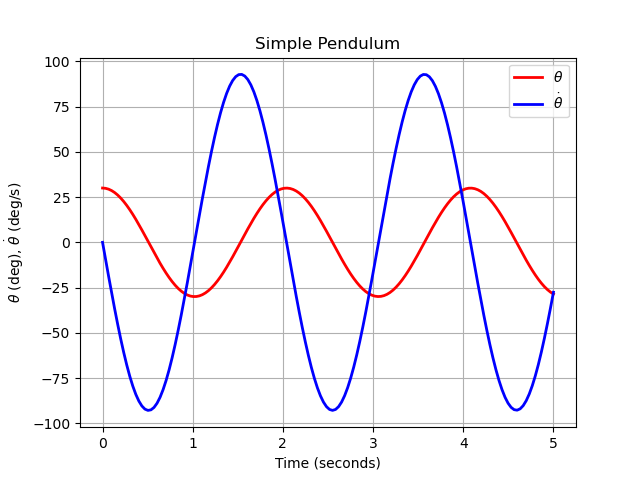

In [6]:
# Create a plot of theta and theta_dot vs time
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()

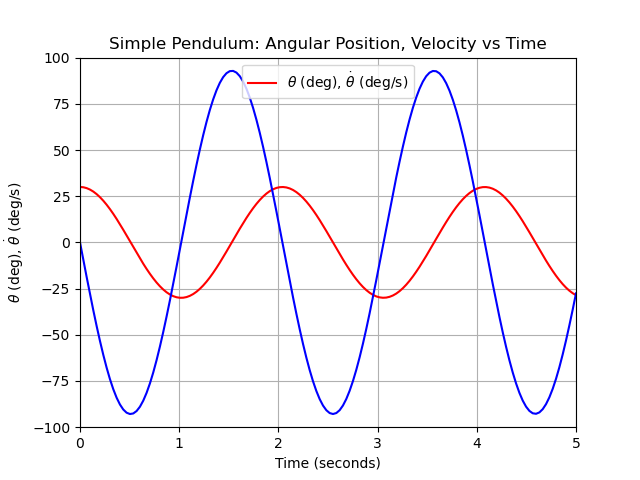

In [12]:
# animate theta, theta_dot vs time
fig, ax = plt.subplots()

theta_curve, = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0,5)
ax.set_ylim(-100,100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax.legend([r'$\theta$ (deg), $\dot \theta$ (deg/s)'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

# save video @ 30fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('time_domain.mp4', writer=ffmpeg_writer)

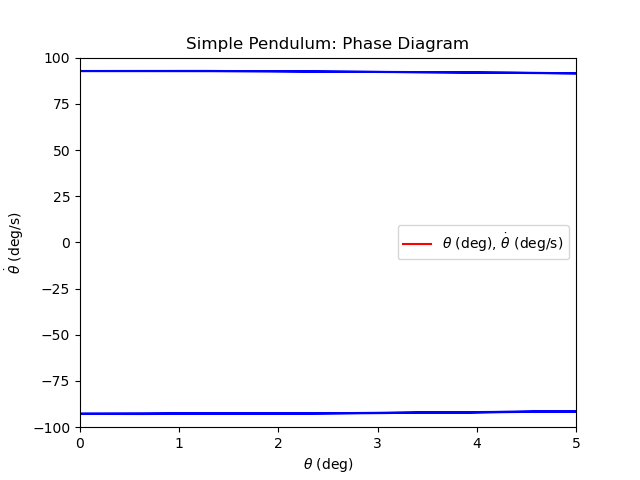

In [8]:
# create a phase diagram of theta, theta_dot
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()

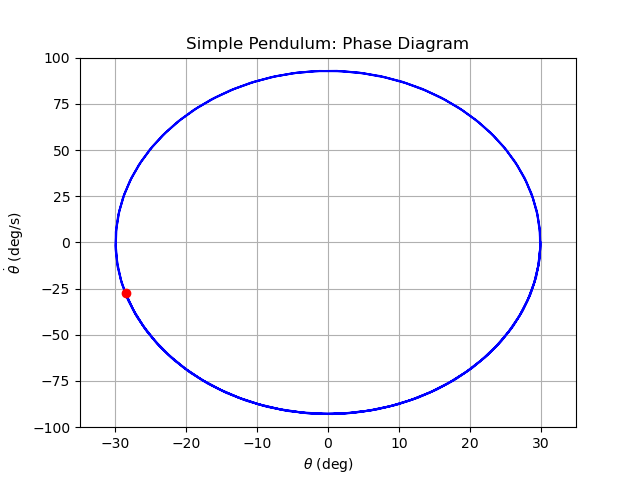

In [9]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, = ax.plot(theta_deg[0], theta_dot_deg[0],'ro')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlim(-35,35)
ax.set_ylim(-100,100)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.grid()

def animate(i):
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data((theta_deg[i],), (theta_dot_deg[i],))

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('phase_diagram.mp4', writer=ffmpeg_writer)

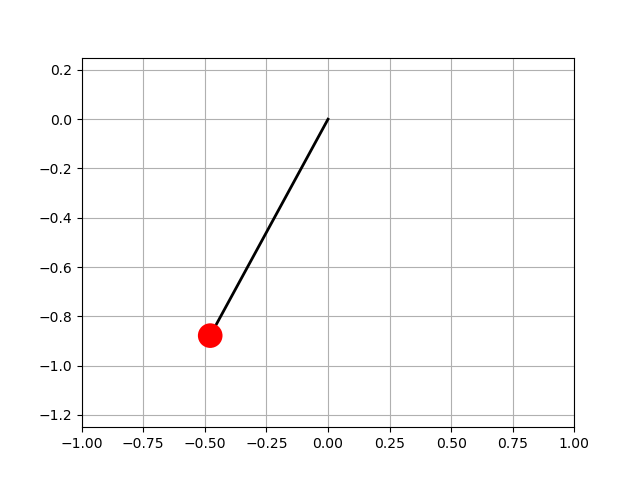

In [10]:
# create an animation of the pendulum swinging
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1,1)
ax.set_ylim(-1.25,0.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0,x0], [0,y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r',zorder=3))

# animate each frame 'i'
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0,x], [0,y])
    circle.set_center((x,y))

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('pend.mp4', writer=ffmpeg_writer)

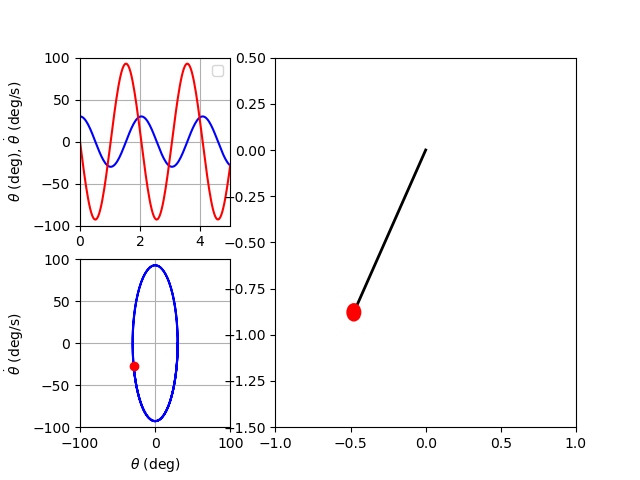

In [11]:
# animate everything together

fig = plt.figure()
gs = gridspec.GridSpec(2,2,width_ratios=[1,2],height_ratios=[1,1])

# time domain
ax0 = fig.add_subplot(gs[0,0])
ax0.set_xlim(0,5)
ax0.set_ylim(-100,100)
ax0.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax0.legend([r'$\theta$ (deg), $\dot \theta$ (deg/s)'])
ax0.grid()

theta_curve, = ax0.plot(t[0], theta_deg[0], 'b')
theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0],'r')

# phase diagram
ax1 = fig.add_subplot(gs[1,0])
ax1.set_xlim(-100,100)
ax1.set_ylim(-100,100)
ax1.set_xlabel(r'$\theta$ (deg)')
ax1.set_ylabel(r'$\dot \theta$ (deg/s)')
ax1.grid()

phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, = ax1.plot(theta_deg[0], theta_dot_deg[0],'ro')

# pendulum diagram
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

ax2 = fig.add_subplot(gs[:,1])
ax2.set_xlim(-1,1)
ax2.set_ylim(-1.5,0.5)
x0, y0 = pend_pos(theta0)
line, = ax2.plot([0,x0], [0,y0], lw=2, c='k')
circle = ax2.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r',zorder=3))

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])
    
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data((theta_deg[i],), (theta_dot_deg[i],))
    
    x,y = pend_pos(theta[i])
    line.set_data([0,x], [0,y])
    circle.set_center((x,y))

# save a video
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('unlimited power.mp4', writer=ffmpeg_writer)